In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import seaborn as sns

In [2]:
TEST_IMAGES_FOLDER_PATH = './data/test_images/'
TRAIN_IMAGES_FOLDER_PATH = './data/train_images/'
LABELS_PATH = './data/train.csv'

In [3]:
print('number of train images:',len(os.listdir(TRAIN_IMAGES_FOLDER_PATH)))
print('number of test images:',len(os.listdir(TEST_IMAGES_FOLDER_PATH)))

number of train images: 5546
number of test images: 3698


In [4]:
labels = pd.read_csv(LABELS_PATH)

In [5]:
labels['name'] = [label.split('_')[0] for label in labels['Image_Label']]
labels['type'] = [label.split('_')[1] for label in labels['Image_Label']]

#### unique types

In [6]:
np.unique(labels['type'])

array(['Fish', 'Flower', 'Gravel', 'Sugar'], dtype=object)

In [7]:
print('number of train images\' label:',len(np.unique(labels['name'])))
print('number of images equal to labels:',len(np.unique(labels['name'])) == len(os.listdir(TRAIN_IMAGES_FOLDER_PATH)))

number of train images' label: 5546
number of images equal to labels: True


### check balance of labels

In [69]:
type_counter = defaultdict(int)
cloud_types = labels[[not isnan(encodedPixels) for encodedPixels in labels['EncodedPixels']]]['type']
for cloud_type in cloud_types:
    type_counter[cloud_type]+=1

defaultdict(<class 'int'>, {'Fish': 2781, 'Flower': 2365, 'Sugar': 3751, 'Gravel': 2939})


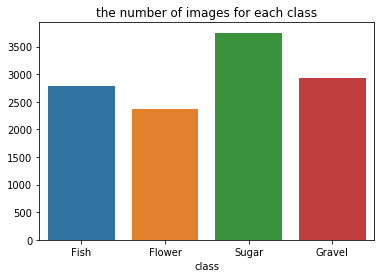

In [77]:
fig, ax = plt.subplots()
sns.barplot(list(type_counter.keys()), list(type_counter.values()))
ax.set_title("the number of images for each class")
ax.set_xlabel("class")
print(type_counter)

{'no pattern': 11836, 'has pattern': 10348}


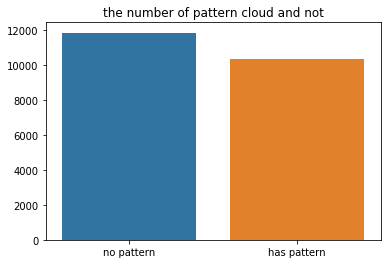

In [80]:
has_patterns = {'no pattern':len(cloud_types), 'has pattern':len(labels)-len(cloud_types)}
fig, ax = plt.subplots()
sns.barplot(list(has_patterns.keys()), list(has_patterns.values()), ax=ax)
ax.set_title('the number of pattern cloud and not')
print(has_patterns)

### Check Image's size

In [8]:
filenames = os.listdir(TRAIN_IMAGES_FOLDER_PATH)

In [86]:
shapes = defaultdict(int)
for filename in tqdm(filenames):
    image = cv2.imread(TRAIN_IMAGES_FOLDER_PATH+filename)
    shapes[image.shape]+=1
print(shapes)

100%|██████████| 5546/5546 [07:07<00:00, 12.98it/s]


defaultdict(<class 'int'>, {(1400, 2100, 3): 5546})


In [111]:
required_memory = [shapes[key]*np.product(key).astype(np.uint64) for key in shapes.keys()][0]
memory_units = ['B', 'KB', 'MB', 'GB']
print('required memory: ',end='')
for i in range(len(memory_units)-1,-1,-1):
    print(f'{int(required_memory//(1024**i))}{memory_units[i]}', end=' ')
    required_memory %= 1024**i
print(f'for {np.sum(list(shapes.values()))} samples')

required memory: 45GB 569MB 681KB 832B for 5546 samples


### Load Images

In [225]:
def imshow_bgr(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
def to_mask(encoded_pixels):
    mask_label = np.zeros(1400*2100, dtype=np.uint8)
    p = encoded_pixels.split(" ")
    positions = map(int, p[0::2])
    length = map(int, p[1::2])
    for pos, le in zip(positions, length):
        mask_label[pos-1:pos+le-1] = 1
    return mask_label.reshape((1400,2100),order='F')

def plot_masked_image(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    temp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.drawContours(temp, contours, -1, (0,255,255), 5) 
    plt.imshow(temp)
        

In [226]:
def isnan(x):
    if type(x) == float:
        return np.isnan(x)
    else:
        return False

0031ae9.jpg 0011165.jpg
Gravel not exist


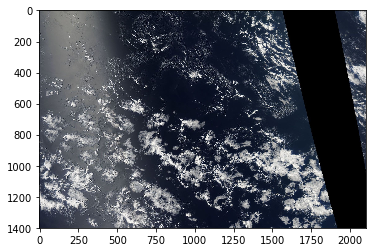

In [290]:
i = 2
image = cv2.imread(TRAIN_IMAGES_FOLDER_PATH+filenames[i])
print(filenames[i], labels['name'][i])
print(labels['type'][i], 'not exist' if (labels['EncodedPixels'][i] is np.nan) else 'exist')
if labels['EncodedPixels'][i] is not np.nan:
    pixels = labels['EncodedPixels'][i]
    plt.figure(figsize=(15,10))
    plot_masked_image(image, to_mask(pixels))
else:
    imshow_bgr(image)

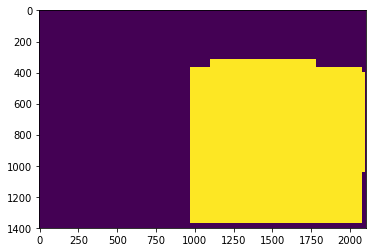

In [285]:
plt.imshow(to_mask(pixels))

In [286]:
m1 = to_mask(pixels)
d = 35
m2 = cv2.resize(cv2.resize(to_mask(pixels), (2100//d,1400//d)), (2100,1400))

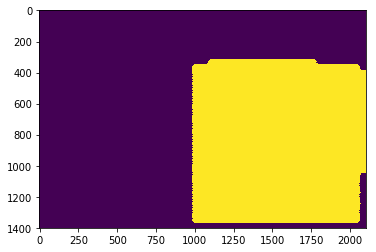

In [288]:
plt.imshow(m2)

In [230]:
contours = plot_masked_image(to_mask(pixels))

TypeError: plot_masked_image() missing 1 required positional argument: 'mask'

In [3]:
temp =pd.read_csv('./output_from_temp2.csv')

In [33]:
len(temp[pd.notna(temp['Image_Label'])])

14792

In [34]:
test = pd.read_csv('./sample_submission.csv')

In [35]:
len(test)

14792

In [50]:
len(temp)

14792

In [56]:
counter = 0
for name1,name2 in zip(test['Image_Label'],temp['Image_Label']):
    if name1 != name2:
        print(name1, name2)
    else:
        counter+=1

In [57]:
counter

14792

In [49]:
temp.to_csv('output_from_temp2v2.csv', index=False)

In [43]:
test[test['Image_Label'].isna()]

,Image_Label,EncodedPixels


In [45]:
temp = temp[pd.notna(temp['Image_Label'])]

In [40]:
temp[temp['Image_Label'].isna()]

,Image_Label,EncodedPixels
45,NaN,NaN
258,NaN,NaN
295,NaN,NaN
370,NaN,NaN
433,NaN,NaN
622,NaN,NaN
1035,NaN,NaN
1148,NaN,NaN
1289,NaN,NaN
1292,NaN,NaN
